In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "data/plant_seedlings/"
TRAIN='train'
TEST= 'test'
sz=299
arch=resnext50
bs=64

In [4]:
files = !ls {PATH}test/*.png
img = plt.imread(files[random.randint(0, len(files))])

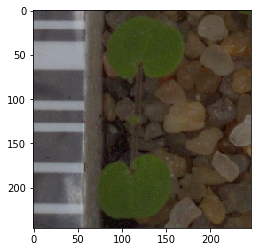

In [5]:
plt.imshow(img)

In [54]:
# run one-time
from glob2 import glob
import pandas as pd

df = pd.DataFrame(columns=["file", "species"])

for image in glob(f"{PATH}train/**/*.png"):
    dir_ = image.split('/')
    file_, species = dir_[-1], dir_[-2]

    df = df.append({"file": file_,
                    "species": species},
                   ignore_index=True)
df.to_csv(f'{PATH}labels.csv', index=False)

In [63]:
df.tail()

,file,species
4745,657ba211d.png,Sugar beet
4746,657feb24d.png,Sugar beet
4747,65e78e25b.png,Sugar beet
4748,66bd9c1bf.png,Sugar beet
4749,67054ec9d.png,Sugar beet


In [6]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)
n, len(val_idxs)

(4750, 950)

In [65]:
FileLink(f'{PATH}labels.csv')

/home/bmn/src/ai.learn/fast.ai/fastai/courses/dl1/data/plant_seedlings/labels.csv

In [7]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms, val_idxs=val_idxs, test_name='test', bs=bs)
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 13/13 [00:16<00:00,  1.27s/it]


In [8]:
learn.lr_find()
learn.sched.plot()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

TypeError: accuracy_multi() missing 1 required positional argument: 'thresh'

In [12]:
learn.fit(0.01, 5, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

TypeError: accuracy_multi() missing 1 required positional argument: 'thresh'